In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
import random
import numpy as np
import cv2
import os, os.path
import glob
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
import gmaps
import gmaps.datasets
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
import gmplot


%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [128]:
#LOADIND TRAIN DATA
data = pd.read_json('train.json')
data.sort_index()


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",low,40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street
18,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",low,40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street
19,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",high,40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue
23,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],low,40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street
32,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",low,40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street


In [7]:
#LOADING TEST DATA
data_test = pd.read_json('test.json')
data_test.sort_index()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place
7,2.0,2,3a956bd42c50f06ac84cf072fc514f5f,2016-06-28 03:44:52,Beautiful 2 bedroom unit with 2 full bathrooms...,W 42nd St.,"[Cats Allowed, Dogs Allowed, No Fee, Doorman, ...",40.7610,7225206,-73.9983,93e03c5179b8f3229fc1c63c0f75d11b,[https://photos.renthop.com/2/7225206_6b8ac259...,4990,650 W 42nd St.
8,3.5,4,628ccc8b016abf804bdf7ae77167cfe3,2016-06-22 05:14:51,,Irving Pl,"[Elevator, Cats Allowed, Dogs Allowed]",40.7358,7200075,-73.9877,7422eabb4c6c3448c000f7be84e5c1b8,[https://photos.renthop.com/2/7200075_abfbded7...,20000,47 Irving Pl
11,1.0,0,52ac9f39766292e9bc3e7eddd32f1d37,2016-06-12 02:24:10,"LOW FEE, AMAZING OVER-SIZED STUDIO IN A LUXURY...",Third Ave,"[Doorman, Elevator, Laundry in Building, Hardw...",40.7814,7145074,-73.9507,5642b01c61afd6b54601365aedc96b68,[https://photos.renthop.com/2/7145074_025b6af2...,2150,1619 Third Ave
12,2.0,4,44c1ee5d0dcc2c9ee7c3e9e53aab4276,2016-06-21 06:50:23,,Rivington St,[No Fee],40.7216,7193645,-73.9927,64249f81378907ae7cf65e8ccb4bd8dc,[https://photos.renthop.com/2/7193645_61e67bb1...,6500,8 Rivington St
13,1.0,1,9ac474eaddc388c582409cba637038a3,2016-06-12 07:35:04,,West 37th Street,"[Fitness Center, Cats Allowed, Dogs Allowed]",40.7553,7147703,-73.9953,11215cda1d873d587dcdf455001c1b84,[https://photos.renthop.com/2/7147703_1fb336cd...,3365,400 West 37th Street


In [129]:
#CHANGE BUILDING_ID TO INT (OPTIONAL)

cat_digit = np.linspace(1,len(data.building_id.unique()), len(data.building_id.unique())).astype(int)
print(cat_digit)
data.building_id = pd.Categorical(data.building_id, data.building_id.unique())
data.building_id  = data.building_id.cat.rename_categories(cat_digit)
data.sort_index()

[   1    2    3 ..., 7583 7584 7585]


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
4,1.0,1,5070,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place
6,1.0,2,900,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th
9,1.0,2,570,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street
10,1.5,3,1,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
15,1.0,0,11,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street
16,1.0,3,69,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",low,40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street
18,2.0,3,172,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",low,40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street
19,1.0,0,619,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",high,40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue
23,0.0,1,4068,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],low,40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street
32,3.0,3,4630,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",low,40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street


In [ ]:
#CHANGE MANAGER_ID TO INT (OPTIONAL)

cat_digit = np.linspace(1,len(data.manager_id.unique()), len(data.manager_id.unique())).astype(int)
print(len(data.manager_id.unique()))
data.manager_id = pd.Categorical(data.manager_id, data.manager_id.unique())
data.manager_id  = data.manager_id.cat.rename_categories(cat_digit)
data

In [63]:
data.groupby(data['interest_level']).describe()

bathrooms      bedrooms      latitude    listing_id  \
interest_level                                                                 
high           count   3839.000000   3839.000000   3839.000000  3.839000e+03   
               mean       1.116176      1.546496     40.748007  7.017844e+06   
               std        0.341725      1.112187      0.051965  1.206596e+05   
               min        0.000000      0.000000     40.575800  6.811957e+06   
               25%        1.000000      1.000000     40.721900  6.913970e+06   
               50%        1.000000      2.000000     40.746500  7.014203e+06   
               75%        1.000000      2.000000     40.773800  7.119334e+06   
               max        4.000000      5.000000     41.086800  7.316287e+06   
low            count  34284.000000  34284.000000  34284.000000  3.428400e+04   
               mean       1.238741      1.514759     40.739504  7.026373e+06   
               std        0.544946      1.111595      0.732933  1.286702e+05   
               min        0.000000      0.000000      0.000000  6.812000e+06   
               25%        1.000000      1.000000     40.729700  6.915616e+06   
               50%        1.000000      1.000000     40.753800  7.024338e+06   
               75%        1.000000      2.000000     40.774725  7.132388e+06   
               max       10.000000      8.000000     44.883500  7.753784e+06   
medium         count  11229.000000  11229.000000  11229.000000  1.122900e+04   
               mean       1.163906      1.622050     40.745567  7.019098e+06   
               std        0.388318      1.122604      0.388466  1.204286e+05   
               min        0.000000      0.000000      0.000000  6.811965e+06   
               25%        1.000000      1.000000     40.726500  6.917736e+06   
               50%        1.000000      2.000000     40.748800  7.013292e+06   
               75%        1.000000      2.000000     40.772400  7.120692e+06   
               max        4.000000      7.000000     44.603800  7.316270e+06   

                         longitude         price  
interest_level                                    
high           count   3839.000000  3.839000e+03  
               mean     -73.964613  2.700293e+03  
               std        0.040286  2.080555e+03  
               min      -74.159800  7.000000e+02  
               25%      -73.990350  1.850000e+03  
               50%      -73.976300  2.400000e+03  
               75%      -73.948600  3.163000e+03  
               max      -73.714200  1.111110e+05  
low            count  34284.000000  3.428400e+04  
               mean     -73.951667  4.176599e+03  
               std        1.355388  2.644932e+04  
               min     -118.271000  4.300000e+01  
               25%      -73.991800  2.625000e+03  
               50%      -73.977900  3.300000e+03  
               75%      -73.956000  4.400000e+03  
               max        0.000000  4.490000e+06  
medium         count  11229.000000  1.122900e+04  
               mean     -73.965033  3.158767e+03  
               std        0.698923  1.243694e+03  
               min      -75.177300  6.950000e+02  
               25%      -73.991800  2.300000e+03  
               50%      -73.978100  2.895000e+03  
               75%      -73.953300  3.650000e+03  
               max        0.000000  1.500000e+04

(5853, 15) (900, 15) (168, 15)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


([<matplotlib.axis.XTick at 0x22d63133ac8>,
 <a list of 3 Text xticklabel objects>)

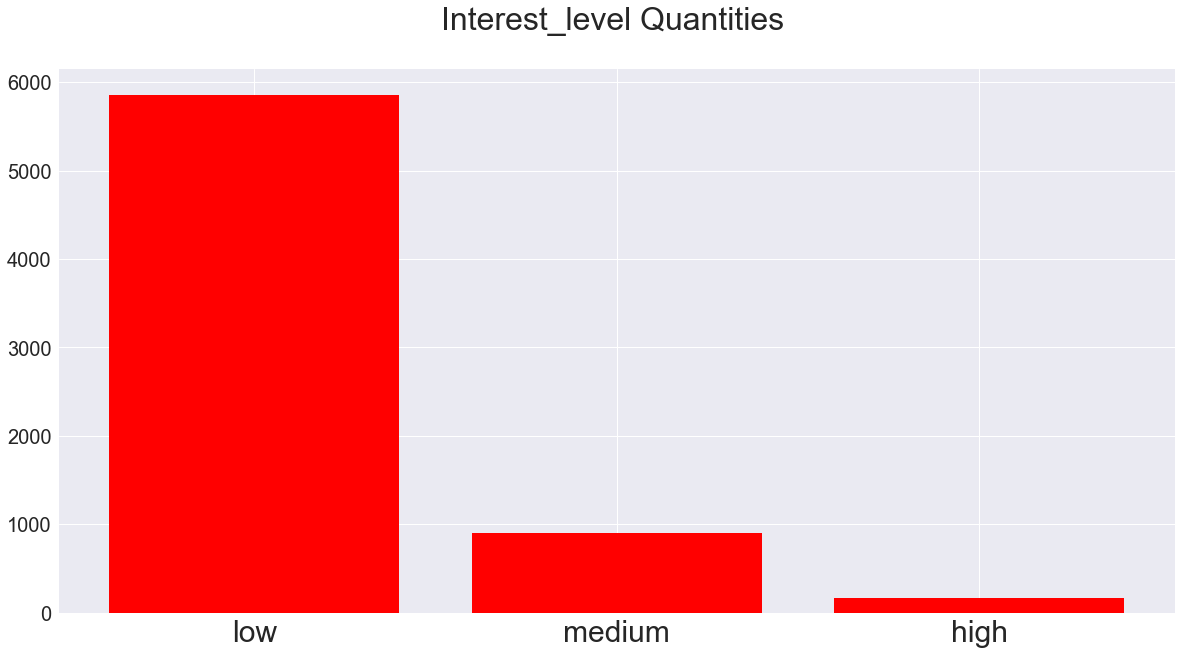

In [104]:
low = data[data['interest_level'] == 'low'][data.price>5000]
medium = data[data['interest_level'] == 'medium'][data.price>5000]
high = data[data['interest_level'] == 'high'][data.price>5000]
print(low.shape, medium.shape, high.shape)
interest_dist = np.array([low.shape[0], medium.shape[0], high.shape[0]])

plt.figure(figsize=(20,10))
plt.title("Interest_level Quantities \n", fontsize=32)

plt.yticks(fontsize=20)
plt.bar(range(3), [interest_dist[i] for i in range(3)], color="r", align="center")

plt.xticks(range(3),['low', 'medium', 'high'], rotation=0, fontsize=30, ha = 'center')

In [116]:
n_bed = 4
crds = data[['latitude', 'longitude']][data.listing_id<7200000].as_matrix()
y = data['interest_level']#[data['bedrooms']==n_bed]
crds.shape

(45074, 2)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<function matplotlib.pyplot.show>

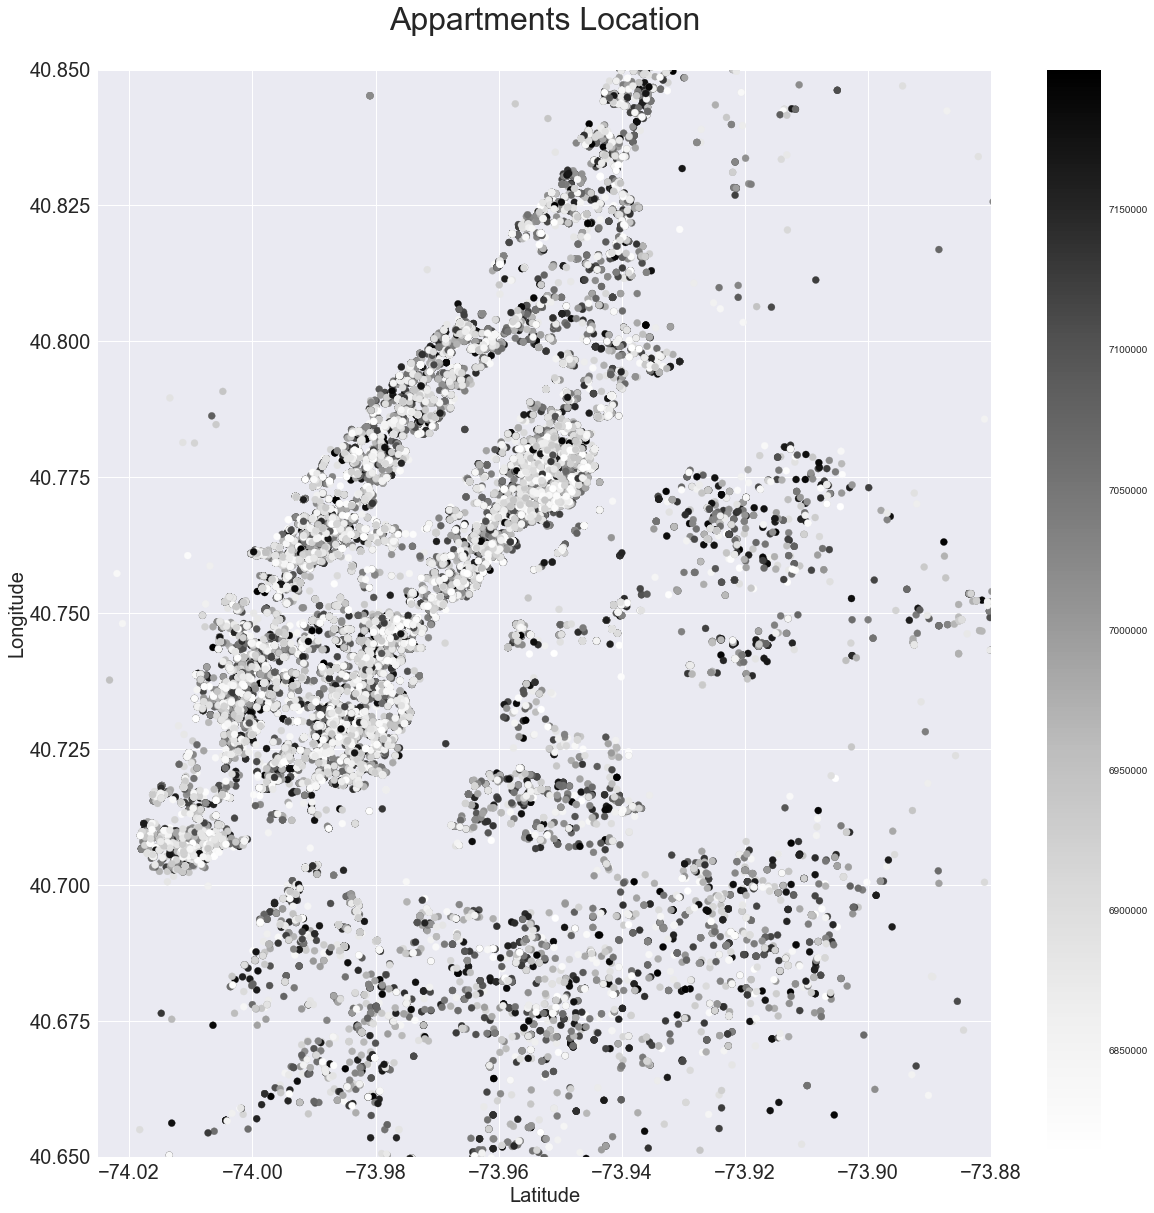

In [117]:
plt.figure(figsize=(20,20))
plt.title('Appartments Location\n', fontsize=32)
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
a = plt.scatter(crds[:, 1], crds[:, 0], c = data.listing_id[data.listing_id<7200000])
plt.colorbar()
#a = plt.plot(crds[blues, 1], crds[blues, 0], "bo", label='medium')
#a = plt.plot(crds[greens, 1], crds[greens, 0], "ro", label='high')
plt.xlim(-74.025,-73.88) 
plt.ylim(40.65,40.85)
plt.legend()
plt.show

<function matplotlib.pyplot.show>

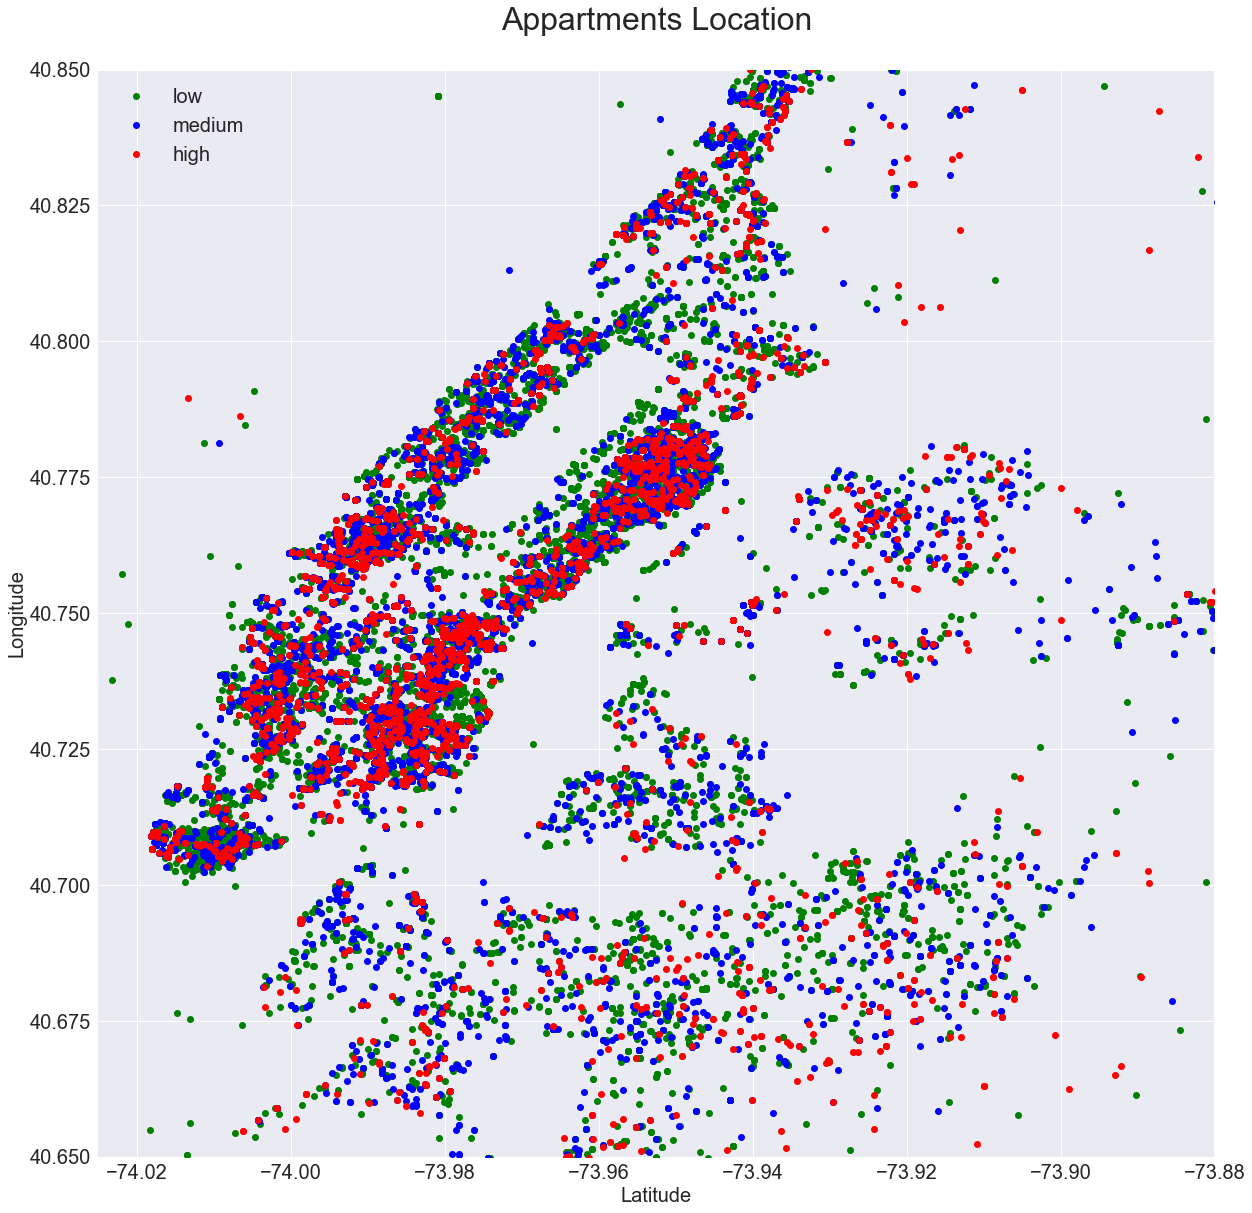

In [77]:
reds = y == 'low'
blues = y == 'medium'
greens = y == 'high'
plt.rcParams["figure.figsize"] = (20,20)


plt.title('Appartments Location\n', fontsize=32)
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
a = plt.plot(crds[reds, 1], crds[reds, 0], "go", label='low')
a = plt.plot(crds[blues, 1], crds[blues, 0], "bo", label='medium')
a = plt.plot(crds[greens, 1], crds[greens, 0], "ro", label='high')
plt.xlim(-74.025,-73.88) 
plt.ylim(40.65,40.85)
plt.legend()
plt.show

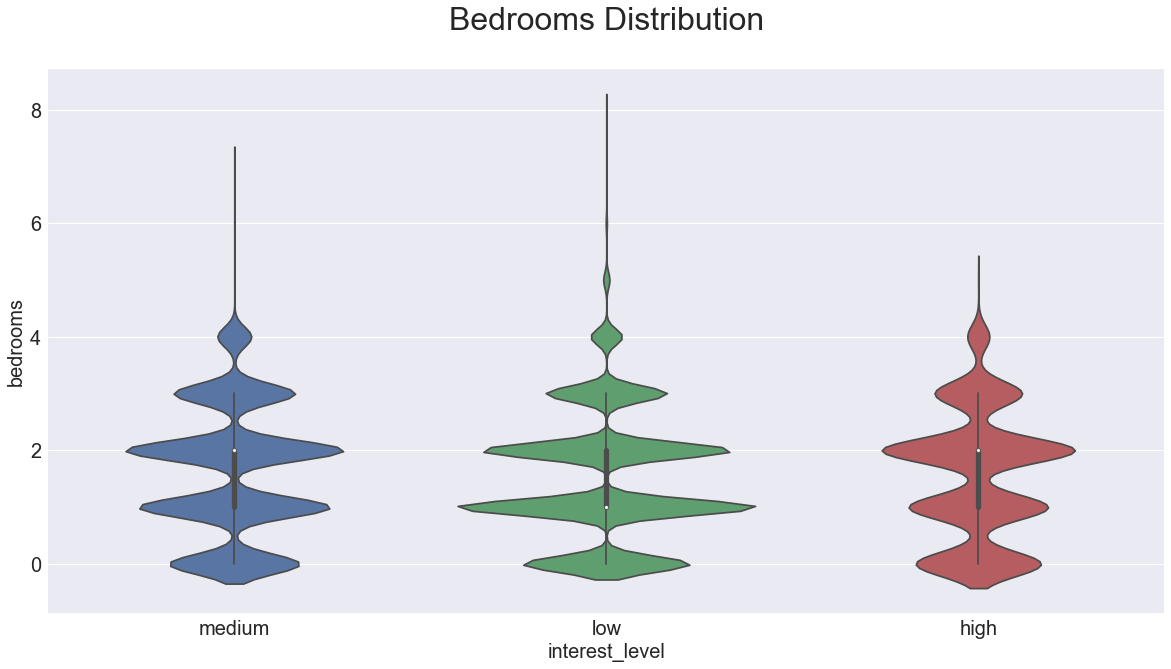

In [73]:
plt.figure(figsize=(20,10))
plt.title('Bedrooms Distribution\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('n_Bedrooms', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot(data = data, x ='interest_level', y = 'bedrooms')


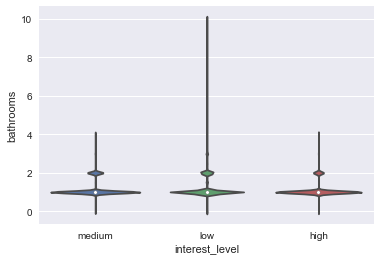

In [260]:
sns.violinplot(data = data, x ='interest_level', y = 'bathrooms')

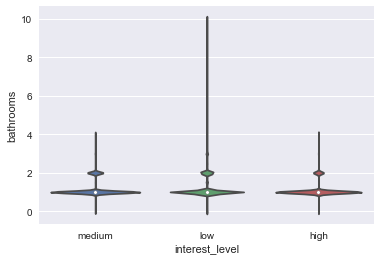

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


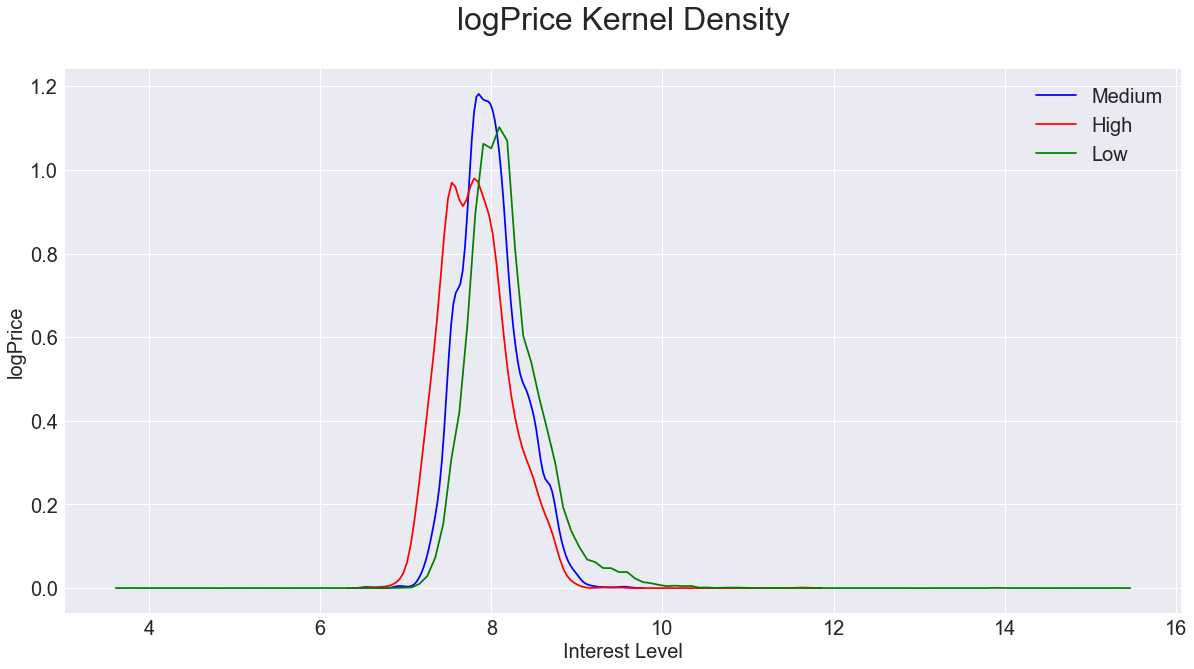

In [72]:
pr_l = np.log(data[data['interest_level'] == 'low']['price'])
pr_m = np.log(data[data['interest_level'] == 'medium']['price'])
pr_h = np.log(data[data['interest_level'] == 'high']['price'])

plt.figure(figsize=(20,10))
plt.title('logPrice Kernel Density\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('logPrice', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
sns.set(font_scale=2) 
sns.kdeplot(pr_m, color = 'blue', label = 'Medium')
sns.kdeplot(pr_h, color = 'red', label = 'High')
sns.kdeplot(pr_l, color = 'green', label = 'Low')

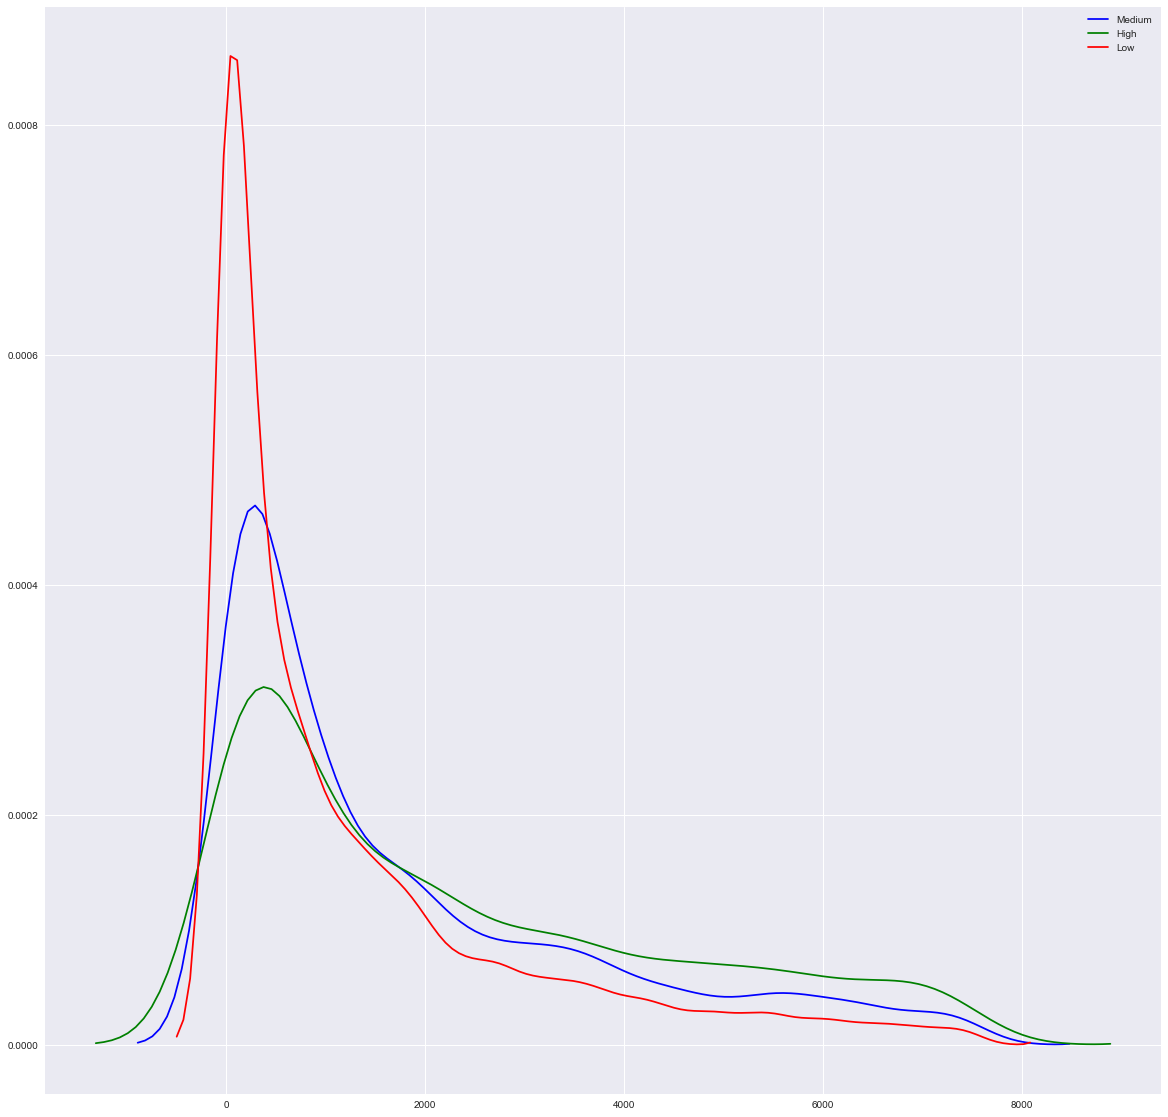

In [110]:
bi_l = data[data['interest_level'] == 'low']['building_id']
bi_m = data[data['interest_level'] == 'medium']['building_id']
bi_h = data[data['interest_level'] == 'high']['building_id']
plt.figure(figsize=(20, 20))
sns.kdeplot(bi_m, color = 'blue', label = 'Medium')
sns.kdeplot(bi_h, color = 'green', label = 'High')
sns.kdeplot(bi_l, color = 'red', label = 'Low')

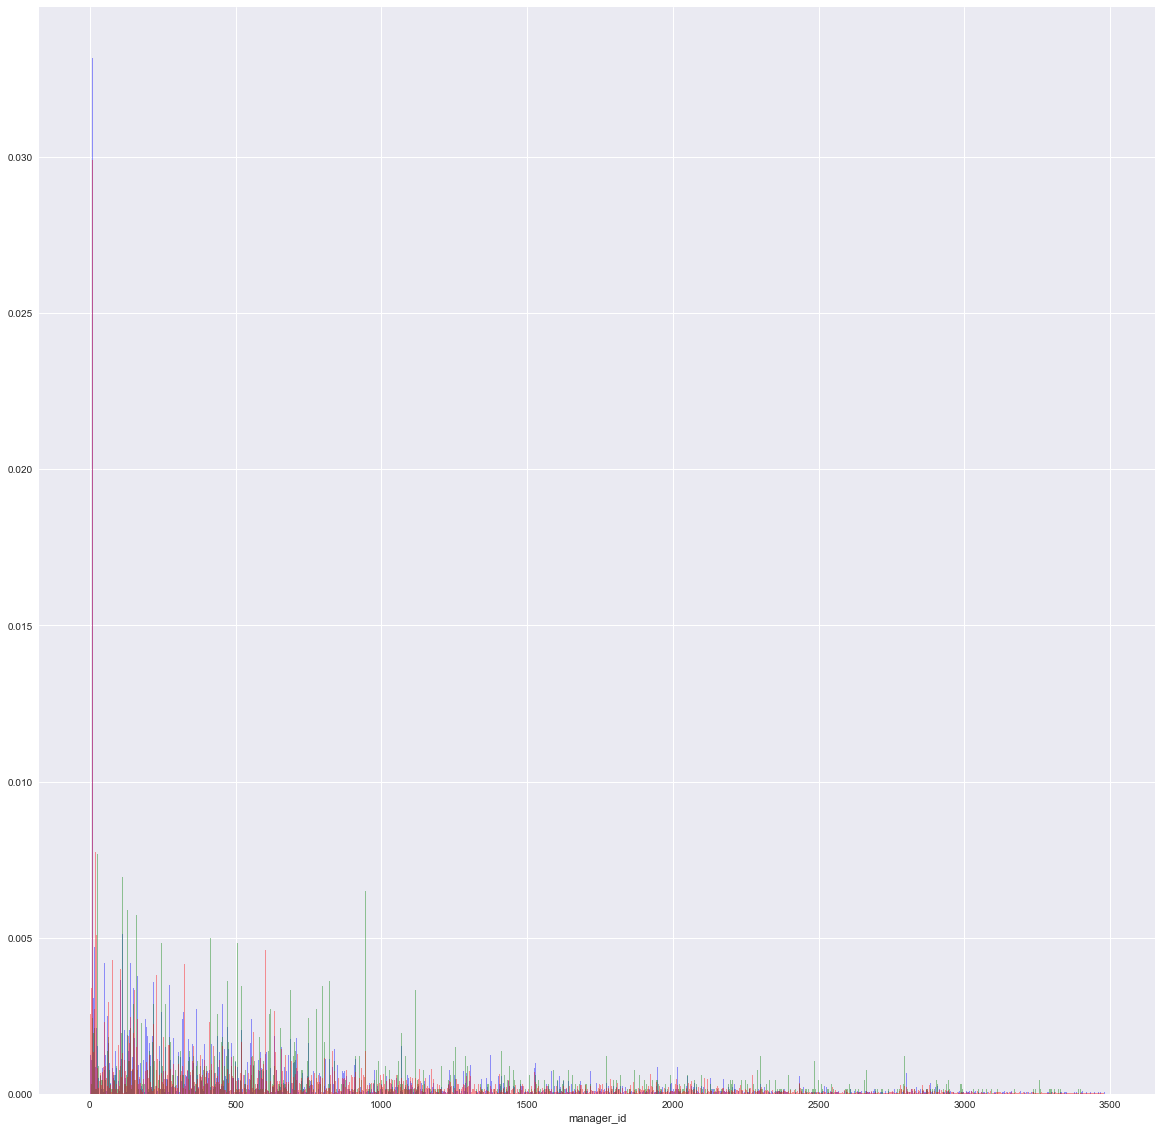

In [112]:
mi_l = data[data['interest_level'] == 'low']['manager_id']
mi_m = data[data['interest_level'] == 'medium']['manager_id']
mi_h = data[data['interest_level'] == 'high']['manager_id']
plt.figure(figsize=(20, 20))
sns.distplot(mi_m, color = 'blue', label = 'Medium', kde = False, bins = 2000, norm_hist = True)
sns.distplot(mi_h, color = 'green', label = 'High',kde = False, bins = 2000,norm_hist = True)
sns.distplot(mi_l, color = 'red', label = 'Low', kde = False, bins = 2000,norm_hist = True)

(-50, 200)

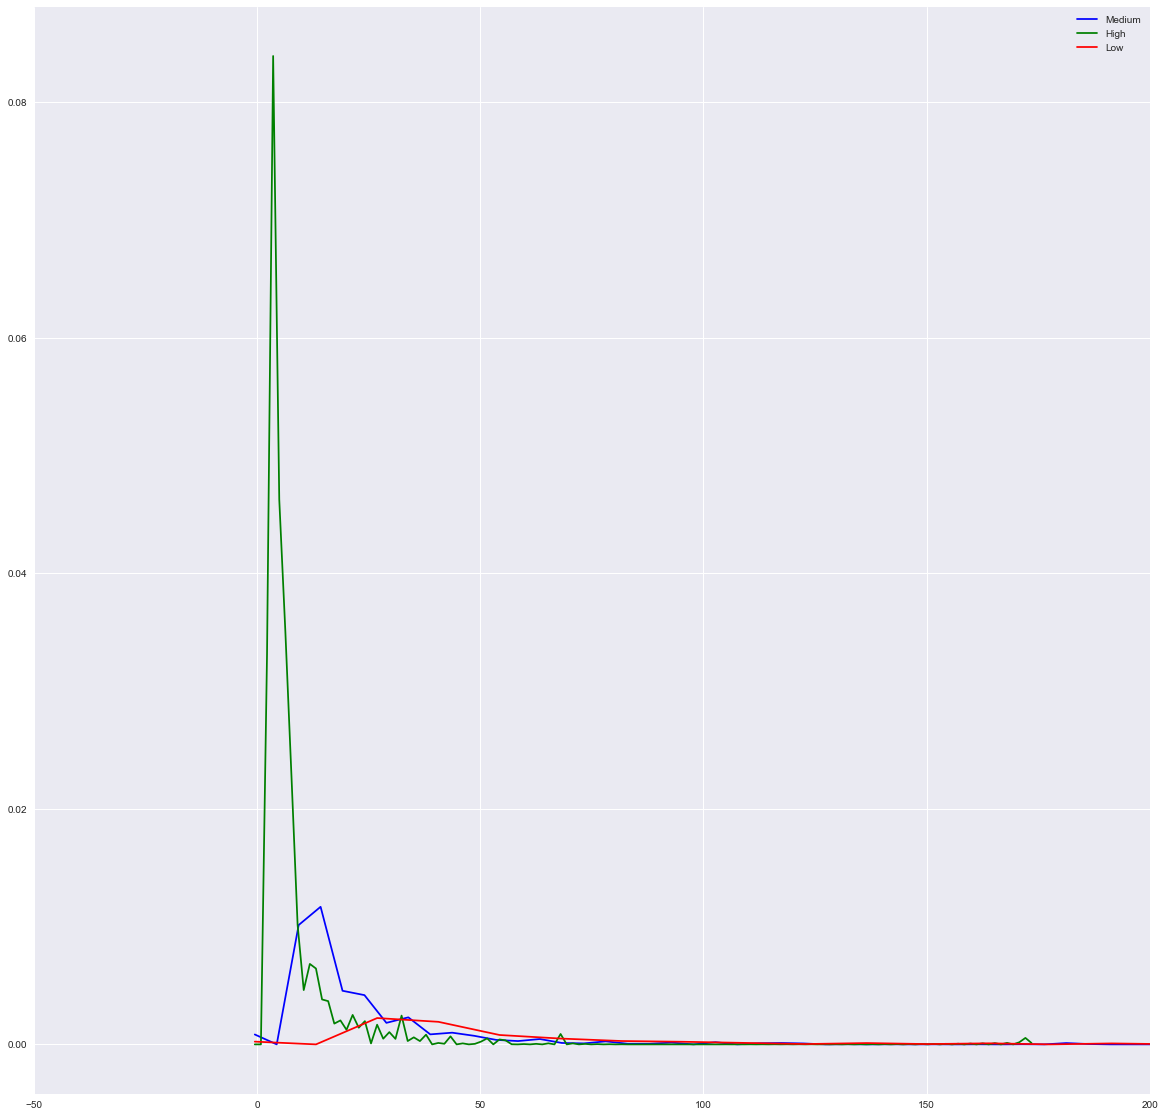

In [285]:

mi_l = data[data['interest_level'] == 'low'].groupby('manager_id')['manager_id'].count().sort_values(ascending=False)
mi_m = data[data['interest_level'] == 'medium'].groupby('manager_id')['manager_id'].count().sort_values(ascending=False)
mi_h = data[data['interest_level'] == 'high'].groupby('manager_id')['manager_id'].count().sort_values(ascending=False)
plt.figure(figsize=(20, 20))
sns.kdeplot(mi_m, color = 'blue', label = 'Medium', bw = .5)
sns.kdeplot(mi_h, color = 'green', label = 'High', bw = .5)
sns.kdeplot(mi_l, color = 'red', label = 'Low',  bw = .5)
plt.xlim(-50,200)

In [129]:
# CONVERT MANAGER_ID INTO MANGER SKILLS

# Mangers count in low, medium, high
mgr_l = data[data['interest_level'] == 'low'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_l')
mgr_m = data[data['interest_level'] == 'medium'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_m')
mgr_h = data[data['interest_level'] == 'high'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_h')
mgr_t = data.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total')

# Saving all results in DataFrame
result = pd.merge(mgr_l, mgr_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['mgr_skill_h'] = result.mgr_cnt_h/result.mgr_cnt_total
result['mgr_skill_m'] = result.mgr_cnt_m/result.mgr_cnt_total
result['mgr_skill_l'] = result.mgr_cnt_l/result.mgr_cnt_total
result_mgr = result.fillna(0)

result_mgr.head()

,manager_id,mgr_cnt_l,mgr_cnt_m,mgr_cnt_h,mgr_cnt_total,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,0000abd7518b94c35a90d64b56fbf3e6,4.0,8.0,0.0,12,0.0,0.666667,0.333333
1,001ce808ce1720e24a9510e014c69707,10.0,0.0,0.0,10,0.0,0.000000,1.000000
2,003fc4e9a70053082f131b1054966aaf,1.0,0.0,0.0,1,0.0,0.000000,1.000000
3,00607a02f6efd9c6c7c588826e471ee9,0.0,2.0,0.0,2,0.0,1.000000,0.000000
4,00995ff28d79127ed2dca8320e9e7d09,2.0,1.0,0.0,3,0.0,0.333333,0.666667


In [130]:
# CONVERT BUILDING_ID INTO BUILDING POPULARITY

# Building count in low, medium, high
building_l = data[data['interest_level'] == 'low'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_l')
building_m = data[data['interest_level'] == 'medium'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_m')
building_h = data[data['interest_level'] == 'high'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_h')
building_t = data.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total')

# Saving all results in DataFrame
result = pd.merge(building_l, building_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['bld_pop_h'] = result.bld_cnt_h/result.bld_cnt_total
result['bld_pop_m'] = result.bld_cnt_m/result.bld_cnt_total
result['bld_pop_l'] = result.bld_cnt_l/result.bld_cnt_total
result_bld = result.fillna(0)
result_bld.head()

,building_id,bld_cnt_l,bld_cnt_m,bld_cnt_h,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l
0,0,7588.0,503.0,195.0,8286,0.023534,0.060705,0.915762
1,00005cb939f9986300d987652c933e15,1.0,0.0,0.0,1,0.000000,0.000000,1.000000
2,00024d77a43f0606f926e2312513845c,0.0,1.0,2.0,3,0.666667,0.333333,0.000000
3,000ae4b7db298401cdae2b0ba1ea8146,0.0,1.0,0.0,1,0.000000,1.000000,0.000000
4,0012f1955391bca600ec301035b97b65,1.0,0.0,0.0,1,0.000000,0.000000,1.000000


In [9]:
#COVERT FEATURES IN NUMBER OF FEATURES
result_wrd = data['features'].apply(len)
result_wrd = result_wrd.to_frame('feature_cnt')
result_wrd.head()

,feature_cnt
10,0
10000,5
100004,4
100007,2
100013,1


In [8]:
def photo_counter(appt_id):
    photo_cnt = np.array([])
    for indx, i in enumerate(appt_id):
        #print(indx)
        path = 'images\%s' % i
        #print(len(glob.glob(os.path.join(path,'*.jpg'))))
        photo_cnt = np.append(photo_cnt, len(glob.glob(os.path.join(path,'*.jpg'))))
    return photo_cnt

In [9]:
#FUNCTION FOR SIMPLE FEATURES FROM PHOTOS (COUNT, RESOLUTION, W, H)

def photo_simple_features(appt_id):
    photo_cnt = np.array([])
    photo_res = np.array([])
    photo_w = np.array([])
    photo_h = np.array([])
    for j, i in enumerate(appt_id):
        path = 'images\%s' % i
        #print(len(glob.glob(os.path.join(path,'*.jpg'))))
        photo_cnt = np.append(photo_cnt, len(glob.glob(os.path.join(path,'*.jpg'))))
        print(j)
        photo_res_temp = np.array([])
        photo_w_temp = np.array([])
        photo_h_temp = np.array([])
        for filename in glob.glob(os.path.join(path,'*.jpg')):
            img = cv2.imread(filename,0)
            photo_res_temp = np.append(photo_res_temp, img.shape[0]*img.shape[1])
            photo_w_temp = np.append(photo_w_temp, img.shape[0])
            photo_h_temp = np.append(photo_h_temp, img.shape[1])
        photo_res = np.append(photo_res, photo_res_temp.mean())
        photo_w = np.append(photo_w, photo_w_temp.mean())
        photo_h = np.append(photo_h, photo_w_temp.mean())  
    return photo_cnt, photo_res, photo_w, photo_h

In [131]:
#MAKING X, Y TRAIN

#Feature counts
feature_wrd_cnt = data['features'].apply(len).to_frame('feature_cnt')
bld_cnt_t = data.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total').reset_index()
mgr_cnt_t = data.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total').reset_index()
description_wrd_cnt = data['description'].str.lower().str.split().apply(len).to_frame('ds_cnt')
created_replace = pd.to_datetime(data["created"]).dt.dayofyear.to_frame('time')

#Picture features
ph_data0 = pd.read_csv('photo(1-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4])
ph_data = ph_data.fillna(0)
ph_data.__delitem__('listing_id')

#preparation step
X_temp = data.reset_index()
X_temp = pd.merge(X_temp, result_bld[['building_id','bld_pop_h','bld_pop_m','bld_pop_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, result_mgr[['manager_id','mgr_skill_h','mgr_skill_m','mgr_skill_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, mgr_cnt_t[['manager_id','mgr_cnt_total']], how='outer', right_index=False) 
X_temp = pd.merge(X_temp, bld_cnt_t[['building_id','bld_cnt_total']], how='outer', right_index=False)
X_temp = X_temp.set_index('index').sort_index()
del X_temp.index.name
X_temp = pd.merge(X_temp, feature_wrd_cnt, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, description_wrd_cnt, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, created_replace, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, ph_data, left_index=True, right_index=True, how='outer')

#final step
X = X_temp[['listing_id','bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'bld_cnt_total', 'bld_pop_h','bld_pop_m',
            'bld_pop_l', 'mgr_cnt_total', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l', 'feature_cnt', 'ds_cnt', 'time',
           'photo_cnt', 'photo_w', 'photo_h', 'photo_res', 'photo_thresh']]
X['photo_h'] = X['photo_res']/X['photo_w']
X = X.fillna(0)
#photo_cnt, photo_res, photo_w, photo_h =  photo_simple_features(X.listing_id)


#X['photo_cnt'] = photo_cnt
#X['photo_res'] = photo_res
#X['photo_w'] = photo_w
#X['photo_h'] = photo_h

y = data['interest_level'].sort_index()

X

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l,...,mgr_skill_m,mgr_skill_l,feature_cnt,ds_cnt,time,photo_cnt,photo_w,photo_h,photo_res,photo_thresh
4,7170325,1.0,1,40.7108,-73.9539,2400,5,0.000000,0.600000,0.400000,...,0.419643,0.526786,7,75,168,12.0,640.000000,480.000000,307200.000000,12933.000000
6,7092344,1.0,2,40.7513,-73.9722,3800,51,0.058824,0.411765,0.529412,...,0.615385,0.346154,6,129,153,6.0,432.500000,640.000000,276800.000000,11410.166667
9,7158677,1.0,2,40.7575,-73.9625,3495,71,0.028169,0.352113,0.619718,...,0.204301,0.763441,6,117,166,6.0,640.000000,480.000000,307200.000000,14707.666667
10,7211212,1.5,3,40.7145,-73.9425,3000,3,0.000000,0.333333,0.666667,...,0.255556,0.744444,0,93,176,5.0,468.800000,581.569966,272640.000000,16844.200000
15,7225292,1.0,0,40.7439,-73.9743,2795,86,0.034884,0.186047,0.779070,...,0.145455,0.854545,4,39,180,4.0,431.500000,570.619930,246222.500000,39007.750000
16,7226687,1.0,3,40.7348,-73.9865,7200,110,0.109091,0.254545,0.636364,...,0.455621,0.331361,6,128,180,5.0,576.000000,565.111111,325504.000000,20270.400000
18,7126989,2.0,3,40.7302,-73.9826,6000,44,0.022727,0.386364,0.590909,...,0.395062,0.574074,5,69,160,7.0,409.142857,640.000000,261851.428571,12876.142857
19,7114138,1.0,0,40.7769,-73.9467,1945,20,0.100000,0.200000,0.700000,...,0.278689,0.581967,5,60,157,5.0,497.200000,594.685438,295677.600000,28832.200000
23,7131094,0.0,1,40.7346,-73.9811,2435,1,0.000000,0.000000,1.000000,...,0.277778,0.583333,1,52,161,4.0,493.000000,549.127789,270720.000000,12642.000000
32,7224815,3.0,3,40.6990,-73.9943,6850,2,0.000000,0.500000,0.500000,...,0.111111,0.888889,2,196,180,11.0,472.272727,467.526468,220800.000000,17200.454545


In [83]:
#MAKING X TEST

#Feature counting
result_wrd_test = data_test['features'].apply(len)
result_wrd_test = result_wrd_test.to_frame('feature_cnt')
test_bld_t = data_test.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total').reset_index()
test_mgr_t = data_test.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total').reset_index()
test_ds_wrd_cnt = data_test['description'].str.lower().str.split().apply(len).to_frame('ds_cnt')
created_replace = pd.to_datetime(data_test["created"]).dt.dayofyear.to_frame('time')

ph_data0 = pd.read_csv('photo_test(0-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo_test(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo_test(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo_test(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo_test(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data5 = pd.read_csv('photo_test(50000-60000).csv')
ph_data5 = ph_data5.set_index('Unnamed: 0')
del ph_data5.index.name
ph_data6 = pd.read_csv('photo_test(60000-70000).csv')
ph_data6 = ph_data6.set_index('Unnamed: 0')
del ph_data6.index.name
ph_data7 = pd.read_csv('photo_test(70000-80000).csv')
ph_data7 = ph_data7.set_index('Unnamed: 0')
del ph_data7.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4])
ph_data = ph_data.fillna(0)
ph_data.__delitem__('listing_id')


#DataFrame preparation
X_temp = data_test.reset_index()
X_temp = pd.merge(X_temp, result_bld[['building_id','bld_pop_h','bld_pop_m','bld_pop_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, result_mgr[['manager_id','mgr_skill_h','mgr_skill_m','mgr_skill_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, test_mgr_t[['manager_id','mgr_cnt_total']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, test_bld_t[['building_id','bld_cnt_total']], how='outer', right_index=False)
X_temp = X_temp[~X_temp['index'].isnull()]
X_temp['index'] = X_temp['index'].astype(int)
X_temp['listing_id'] = X_temp['listing_id'].astype(int)
X_temp = X_temp.fillna(0)
X_temp = X_temp.set_index('index').sort_index()
del X_temp.index.name
X_temp = pd.merge(X_temp, result_wrd_test, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, test_ds_wrd_cnt, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, ph_data, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, created_replace, left_index=True, right_index=True, how='outer')
#Extracting meaningful data
X_test = X_temp[['listing_id','bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'bld_cnt_total', 'bld_pop_h','bld_pop_m',
            'bld_pop_l', 'mgr_cnt_total', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l', 'feature_cnt', 'ds_cnt', 'time',
           'photo_cnt', 'photo_w', 'photo_h', 'photo_res', 'photo_thresh']]

X_test['photo_h'] = X_test['photo_res']/X_test['photo_w']
#X_test = X_temp[['listing_id','bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'bld_cnt_total', 'feature_cnt', 'ds_cnt', 'time', 
#               'photo_cnt', 'photo_w', 'photo_h', 'photo_thresh']]
X_test = X_test.fillna(0)
X_test.sort_index()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l,...,mgr_skill_m,mgr_skill_l,feature_cnt,ds_cnt,time,photo_cnt,photo_w,photo_h,photo_res,photo_thresh
0,7142618,1.0,1.0,40.7185,-73.9865,2950.0,5.0,0.000000,1.000000,0.000000,...,0.333333,0.458333,6,76,163,8.0,425.000000,640.000000,272000.000000,23279.125000
1,7210040,1.0,2.0,40.7278,-74.0000,2850.0,12378.0,0.023534,0.060705,0.915762,...,0.000000,1.000000,3,34,176,3.0,555.333333,578.535414,321280.000000,30754.666667
2,7174566,1.0,0.0,40.7260,-74.0026,2295.0,12378.0,0.023534,0.060705,0.915762,...,0.245559,0.686538,3,38,169,1.0,426.000000,640.000000,272640.000000,13707.000000
3,7191391,1.0,2.0,40.7321,-74.0028,2900.0,10.0,0.250000,0.000000,0.750000,...,0.284615,0.661538,3,20,173,4.0,430.000000,580.465116,249600.000000,30867.750000
5,7171695,1.0,1.0,40.7054,-74.0095,3254.0,94.0,0.064935,0.259740,0.675325,...,0.440000,0.560000,10,83,168,6.0,471.666667,558.833922,263583.333333,24130.000000
7,7225206,2.0,2.0,40.7610,-73.9983,4990.0,151.0,0.032520,0.260163,0.707317,...,0.278689,0.721311,12,132,180,8.0,440.875000,612.599943,270080.000000,27113.375000
8,7200075,3.5,4.0,40.7358,-73.9877,20000.0,2.0,0.000000,0.000000,0.000000,...,0.016393,0.950820,3,0,174,15.0,440.000000,619.345455,272512.000000,22591.133333
11,7145074,1.0,0.0,40.7814,-73.9507,2150.0,17.0,0.208333,0.458333,0.333333,...,0.573171,0.304878,5,88,164,3.0,292.000000,440.000000,128480.000000,14858.333333
12,7193645,2.0,4.0,40.7216,-73.9927,6500.0,29.0,0.000000,0.187500,0.812500,...,0.038462,0.961538,1,0,173,7.0,480.000000,596.000000,286080.000000,26234.142857
13,7147703,1.0,1.0,40.7553,-73.9953,3365.0,46.0,0.000000,0.166667,0.833333,...,0.000000,1.000000,3,0,164,18.0,406.000000,601.000000,244006.000000,33250.833333


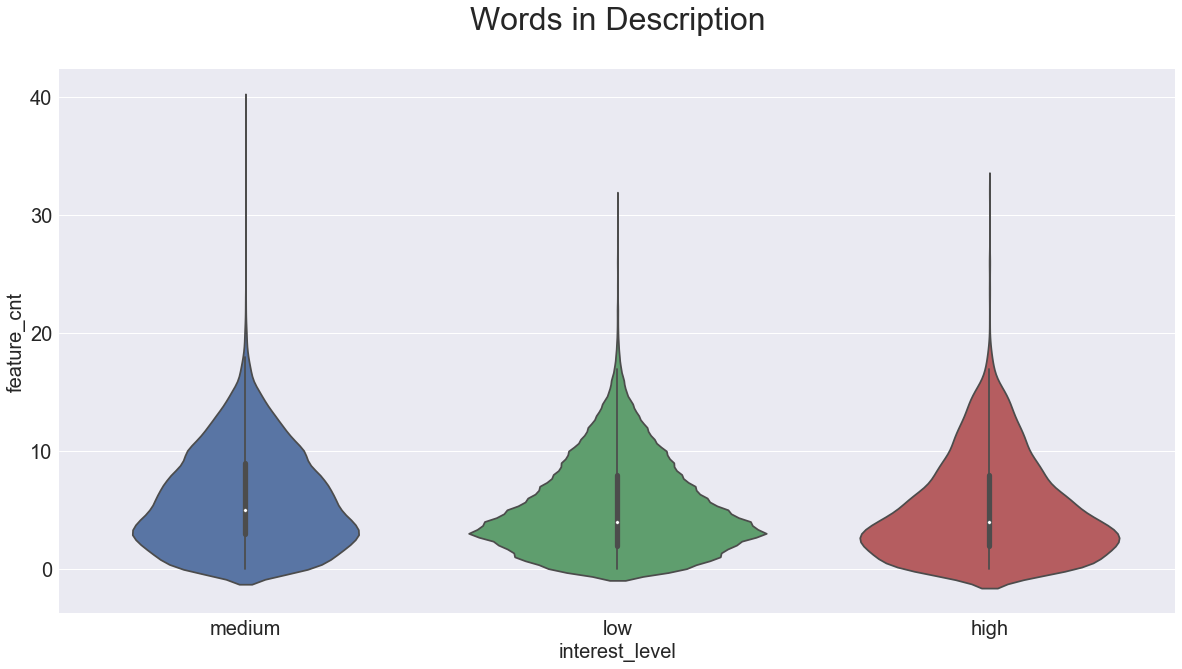

In [107]:
plt.figure(figsize=(20,10))
plt.title('Words in Description\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('n_Bedrooms', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['feature_cnt'])

In [ ]:
X[X['longitude']>-73.9] = X['longitude'].mean()
X[X['longitude']<-74.05] = X['longitude'].mean()
X[X['latitude']>42] = X['latitude'].mean()
X[X['latitude']<39] = X['latitude'].mean()

In [51]:
X[X['latitude']<40]=X['latitude'].mean()

In [49]:
X[X['latitude']<]

,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l,...,mgr_skill_m,mgr_skill_l,feature_cnt,ds_cnt,time,photo_cnt,photo_w,photo_h,photo_res,photo_thresh


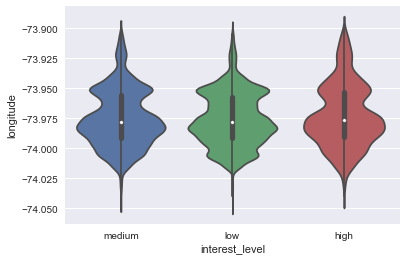

In [31]:
plt.figure(figsize=(20,10))
plt.title('La\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('n_Bedrooms', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['longitude'])

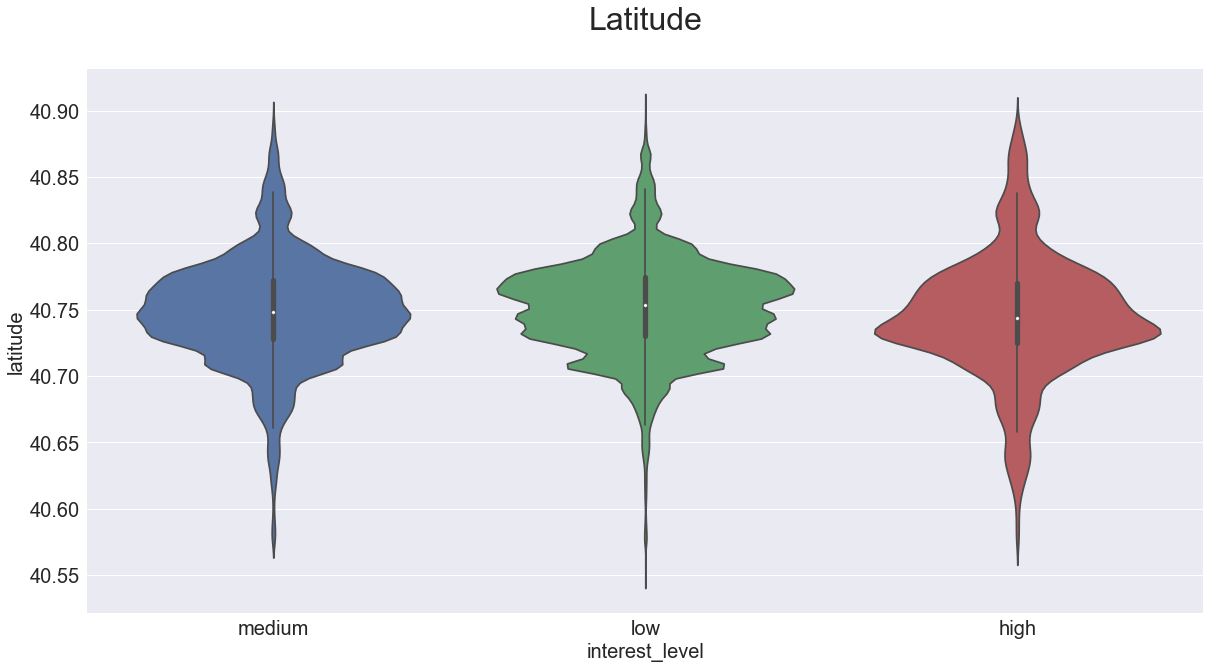

In [53]:
plt.figure(figsize=(20,10))
plt.title('Latitude\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['latitude'])

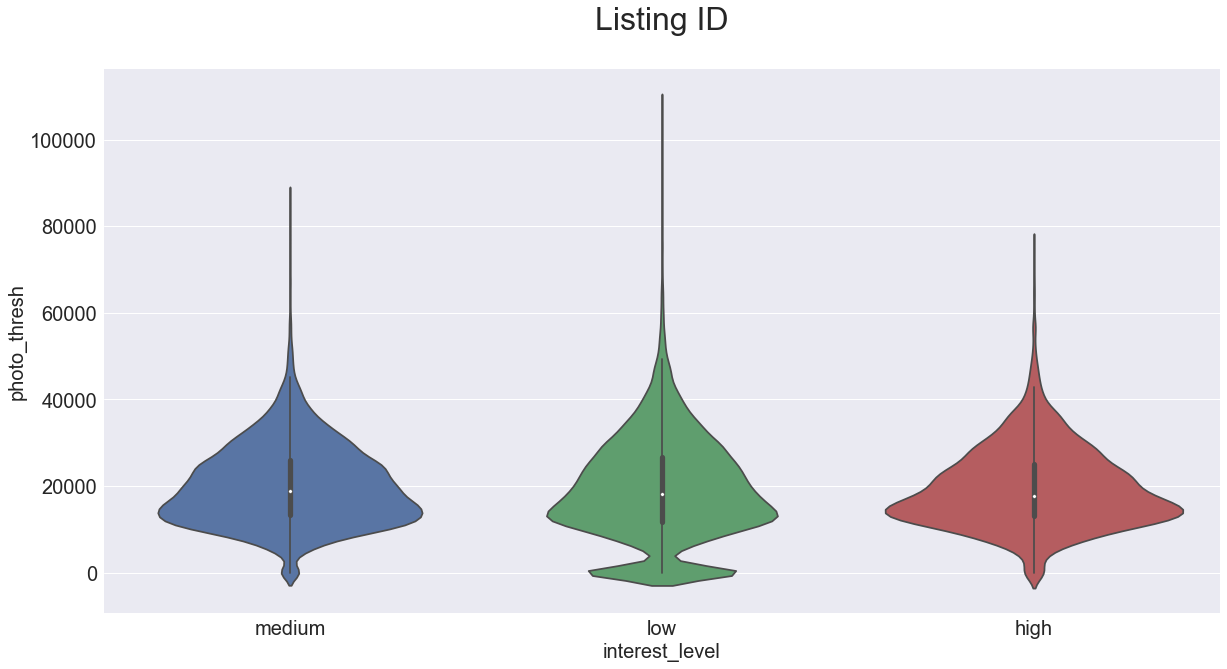

In [124]:
plt.figure(figsize=(20,10))
plt.title('Listing ID\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['photo_thresh'])

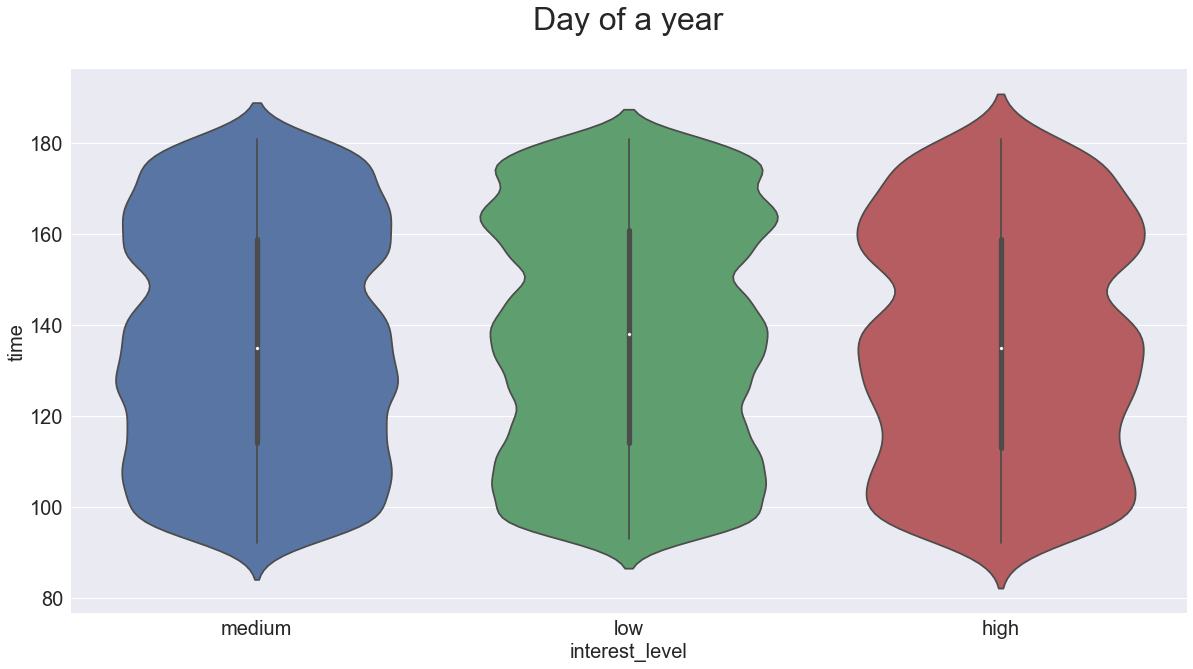

In [63]:
plt.figure(figsize=(20,10))
plt.title('Day of a year\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['time'])

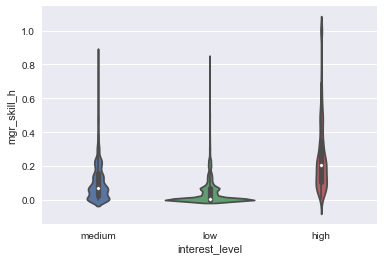

In [316]:
sns.violinplot( x =y, y = X['mgr_skill_h'])

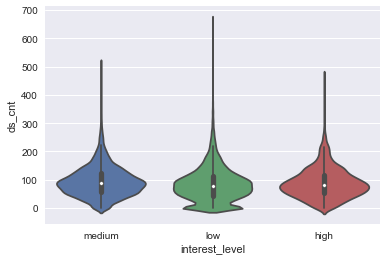

In [317]:
sns.violinplot( x =y, y = X['ds_cnt'])

Feature ranking:
1. feature 5 - price (0.106466)
2. feature 6 - bld_cnt_total (0.090117)
3. feature 0 - listing_id (0.073627)
4. feature 15 - photo_thresh (0.068763)
5. feature 10 - time (0.068300)
6. feature 3 - latitude (0.064170)
7. feature 9 - ds_cnt (0.063989)
8. feature 4 - longitude (0.062986)
9. feature 7 - mgr_cnt_total (0.061153)
10. feature 8 - feature_cnt (0.059230)
11. feature 14 - photo_res (0.058164)
12. feature 12 - photo_w (0.056945)
13. feature 13 - photo_w (0.056206)
14. feature 11 - photo_cnt (0.053718)
15. feature 2 - bedrooms (0.038608)
16. feature 1 - bathrooms (0.017557)


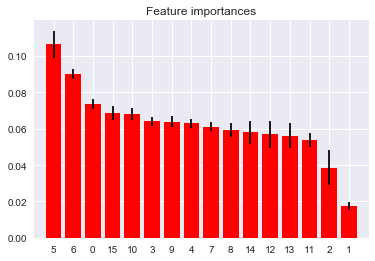

In [198]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X_d, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_d.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], X_d.columns.values[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_d.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_d.shape[1]), indices)
plt.xlim([-1, X_d.shape[1]])
plt.show()

In [ ]:
y.sort_index().head()

In [ ]:
#MAKE SLICED LISTING iD

X.listing_id[0:10000].to_csv('listing_id(1-10000).csv')
X.listing_id[10000:20000].to_csv('listing_id(10000-20000).csv')
X.listing_id[20000:30000].to_csv('listing_id(20000-30000).csv')
X.listing_id[30000:40000].to_csv('listing_id(30000-40000).csv')
X.listing_id[40000:].to_csv('listing_id(40000-50000).csv')

In [101]:
#MAKE SLICED LISTING iD IN X_test

X_test.listing_id[0:10000].to_csv('listing_id_test(1-10000).csv')
X_test.listing_id[10000:20000].to_csv('listing_id_test(10000-20000).csv')
X_test.listing_id[20000:30000].to_csv('listing_id_test(20000-30000).csv')
X_test.listing_id[30000:40000].to_csv('listing_id_test(30000-40000).csv')
X_test.listing_id[40000:50000].to_csv('listing_id_test(40000-50000).csv')
X_test.listing_id[50000:60000].to_csv('listing_id_test(50000-60000).csv')
X_test.listing_id[60000:70000].to_csv('listing_id_test(60000-70000).csv')
X_test.listing_id[70000:].to_csv('listing_id_test(70000-80000).csv')

In [ ]:
#X.listing_id.to_csv('listing_id.csv')
len(X_test.listing_id)
#b = np.genfromtxt('listing_id.csv', delimiter=',')
#c = pd.DataFrame({'listing_id': b[:,1]} , index = b[:,0].astype(int))
#c

In [179]:
X_d = X.drop(['bld_pop_h','bld_pop_m','bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l', 'photo_res', 'photo_w', 'photo_h', 'photo_thresh'], axis = 1)
#X_test_d = X_test.drop(['photo_res', 'photo_h', 'photo_w', 'photo_thresh',  'bld_pop_h','bld_pop_m',
#            'bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l'],axis=1)
X_d['hour'] =  pd.to_datetime(data.sort_index().created).dt.hour
X_d['hours_t'] = X_d.time*24+X_d.hour
X_d['dol_r'] = (X_d.bedrooms+X_d.bathrooms)/X_d.price
X_d['dol_d'] = X_d.hours_t/X_d.price
X_train, X_val, y_train, y_val = train_test_split(X_d, y, test_size=0.33,random_state = 0)
X_d


,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,mgr_cnt_total,feature_cnt,ds_cnt,time,photo_cnt,hour,hours_t,dol_r,dol_d
4,7170325,1.0,1,40.7108,-73.9539,2400,5,112,7,75,168,12.0,5,4037,0.000833,1.682083
6,7092344,1.0,2,40.7513,-73.9722,3800,51,26,6,129,153,6.0,5,3677,0.000789,0.967632
9,7158677,1.0,2,40.7575,-73.9625,3495,71,93,6,117,166,6.0,15,3999,0.000858,1.144206
10,7211212,1.5,3,40.7145,-73.9425,3000,3,90,0,93,176,5.0,7,4231,0.001500,1.410333
15,7225292,1.0,0,40.7439,-73.9743,2795,86,55,4,39,180,4.0,3,4323,0.000358,1.546691
16,7226687,1.0,3,40.7348,-73.9865,7200,110,169,6,128,180,5.0,5,4325,0.000556,0.600694
18,7126989,2.0,3,40.7302,-73.9826,6000,44,162,5,69,160,7.0,6,3846,0.000833,0.641000
19,7114138,1.0,0,40.7769,-73.9467,1945,20,122,5,60,157,5.0,5,3773,0.000514,1.939846
23,7131094,0.0,1,40.7346,-73.9811,2435,1,36,1,52,161,4.0,4,3868,0.000411,1.588501
32,7224815,3.0,3,40.6990,-73.9943,6850,2,36,2,196,180,11.0,3,4323,0.000876,0.631095


In [168]:
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.58771409719653733

In [ ]:
y_test = clf.predict(X_test_d)

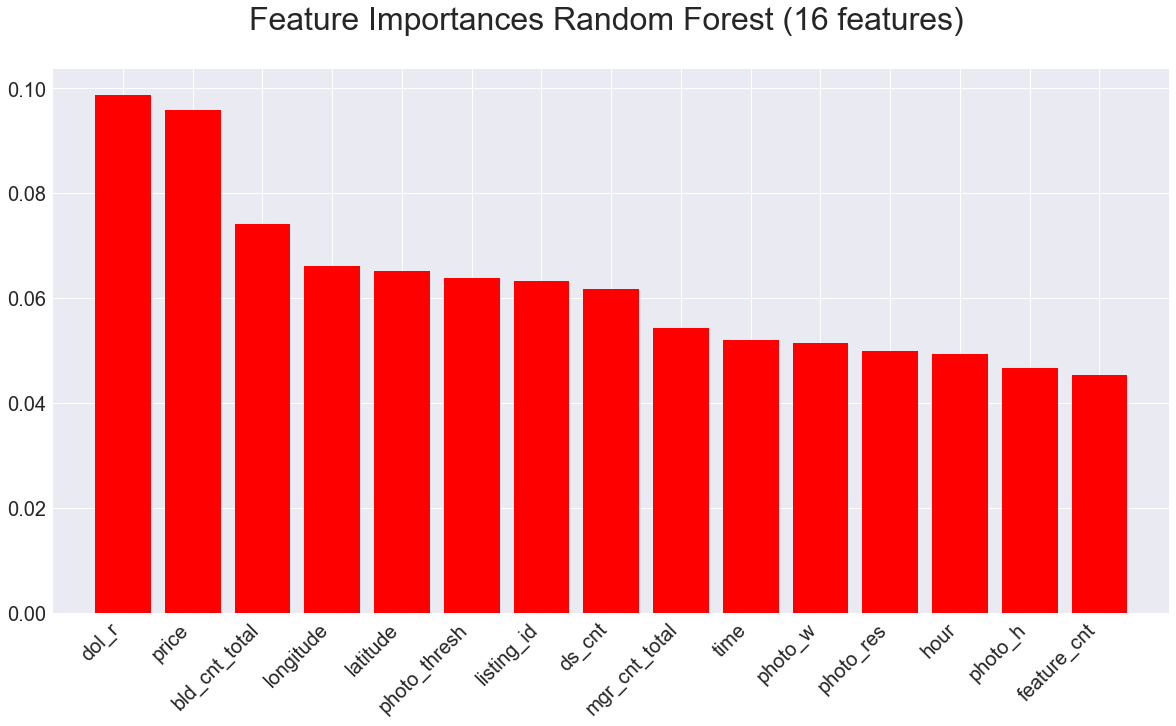

In [169]:
def feat_imp(df, model, n_features):

    d = dict(zip(df.columns, model.feature_importances_))
    ss = sorted(d, key=d.get, reverse=True)
    top_names = ss[0:n_features]
    plt.figure(figsize=(20,10))

    plt.figure(figsize=(20,10))
    plt.title("Feature Importances Random Forest (16 features) \n", fontsize=32)
   
    plt.yticks(fontsize=20)
    plt.bar(range(n_features), [d[i] for i in top_names], color="r", align="center")
    plt.xlim(-1, n_features)
    plt.xticks(range(n_features), top_names, rotation=45, fontsize=20, ha = 'right')

feat_imp(X_train,clf, 15)

In [175]:
X_all = pd.concat([X_d,X_test_d]).sort_index()
y_all = pd.concat([y, pd.Series(y_test, index= X_test.index)]).sort_index()
data_all = pd.concat([data.sort_index(),data_test.sort_index()])
data_all['interest_level'] = y_all
data_all

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",low,40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street
18,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",low,40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street
19,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",high,40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue
23,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],low,40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street
32,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",low,40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street


In [159]:
# CONVERT MANAGER_ID INTO MANGER SKILLS

# Mangers count in low, medium, high
mgr_l = data_all[data_all['interest_level'] == 'low'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_l')
mgr_m = data_all[data_all['interest_level'] == 'medium'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_m')
mgr_h = data_all[data_all['interest_level'] == 'high'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_h')
mgr_t = data_all.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total')

# Saving all results in DataFrame
result = pd.merge(mgr_l, mgr_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['mgr_skill_h'] = result.mgr_cnt_h/result.mgr_cnt_total
result['mgr_skill_m'] = result.mgr_cnt_m/result.mgr_cnt_total
result['mgr_skill_l'] = result.mgr_cnt_l/result.mgr_cnt_total
result_mgr = result.fillna(0)

result_mgr.head()

,manager_id,mgr_cnt_l,mgr_cnt_m,mgr_cnt_h,mgr_cnt_total,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,0000abd7518b94c35a90d64b56fbf3e6,26.0,9.0,0.0,35,0.0,0.257143,0.742857
1,001ce808ce1720e24a9510e014c69707,28.0,0.0,0.0,28,0.0,0.000000,1.000000
2,003fc4e9a70053082f131b1054966aaf,4.0,0.0,0.0,4,0.0,0.000000,1.000000
3,00607a02f6efd9c6c7c588826e471ee9,9.0,2.0,0.0,11,0.0,0.181818,0.818182
4,00995ff28d79127ed2dca8320e9e7d09,7.0,2.0,0.0,9,0.0,0.222222,0.777778


In [160]:
# CONVERT BUILDING_ID INTO BUILDING POPULARITY

# Building count in low, medium, high
building_l = data_all[data_all['interest_level'] == 'low'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_l')
building_m = data_all[data_all['interest_level'] == 'medium'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_m')
building_h = data_all[data_all['interest_level'] == 'high'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_h')
building_t = data_all.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total')

# Saving all results in DataFrame
result = pd.merge(building_l, building_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['bld_pop_h'] = result.bld_cnt_h/result.bld_cnt_total
result['bld_pop_m'] = result.bld_cnt_m/result.bld_cnt_total
result['bld_pop_l'] = result.bld_cnt_l/result.bld_cnt_total
result_bld = result.fillna(0)
result_bld.head()

,building_id,bld_cnt_l,bld_cnt_m,bld_cnt_h,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l
0,0,19907.0,543.0,214.0,20664,0.010356,0.026278,0.963366
1,00005cb939f9986300d987652c933e15,1.0,0.0,0.0,1,0.000000,0.000000,1.000000
2,00024d77a43f0606f926e2312513845c,4.0,1.0,2.0,7,0.285714,0.142857,0.571429
3,000ae4b7db298401cdae2b0ba1ea8146,1.0,1.0,0.0,2,0.000000,0.500000,0.500000
4,0012f1955391bca600ec301035b97b65,1.0,0.0,0.0,1,0.000000,0.000000,1.000000


In [177]:
X_temp = data_all.reset_index()
X_temp = pd.merge(X_temp, result_bld[['building_id','bld_pop_h','bld_pop_m','bld_pop_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, result_mgr[['manager_id','mgr_skill_h','mgr_skill_m','mgr_skill_l']], how='outer', right_index=False)
X_temp = X_temp[~X_temp['index'].isnull()]
X_temp['index'] = X_temp['index'].astype(int)
X_temp = X_temp.fillna(0)
X_temp = X_temp.set_index('index').sort_index()
del X_temp.index.name
X_temp

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,manager_id,photos,price,street_address,bld_pop_h,bld_pop_m,bld_pop_l,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",low,40.7185,7142618,...,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street,0.000000,0.500000,0.500000,0.096774,0.209677,0.693548
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7278,7210040,...,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street,0.010356,0.026278,0.963366,0.000000,0.000000,1.000000
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7260,7174566,...,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street,0.010356,0.026278,0.963366,0.036793,0.130578,0.832629
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",medium,40.7321,7191391,...,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street,0.071429,0.357143,0.571429,0.032680,0.156863,0.810458
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,...,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,0.000000,0.375000,0.625000,0.027211,0.265306,0.707483
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",low,40.7054,7171695,...,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place,0.035088,0.146199,0.818713,0.000000,0.283333,0.716667
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,...,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,0.027273,0.236364,0.736364,0.015625,0.265625,0.718750
7,2.0,2,3a956bd42c50f06ac84cf072fc514f5f,2016-06-28 03:44:52,Beautiful 2 bedroom unit with 2 full bathrooms...,W 42nd St.,"[Cats Allowed, Dogs Allowed, No Fee, Doorman, ...",low,40.7610,7225206,...,93e03c5179b8f3229fc1c63c0f75d11b,[https://photos.renthop.com/2/7225206_6b8ac259...,4990,650 W 42nd St.,0.014599,0.153285,0.832117,0.000000,0.135135,0.864865
8,3.5,4,628ccc8b016abf804bdf7ae77167cfe3,2016-06-22 05:14:51,,Irving Pl,"[Elevator, Cats Allowed, Dogs Allowed]",low,40.7358,7200075,...,7422eabb4c6c3448c000f7be84e5c1b8,[https://photos.renthop.com/2/7200075_abfbded7...,20000,47 Irving Pl,0.000000,0.000000,1.000000,0.015957,0.026596,0.957447
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,...,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,0.012658,0.208861,0.778481,0.015094,0.098113,0.886792


In [202]:
X_all[['bld_pop_h','bld_pop_m', 'bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l']] = X_temp[['bld_pop_h','bld_pop_m', 'bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l']]
X_all
y_all = y_all.sort_index()
y_all.ix[X_test.index]

0            low
1            low
2            low
3         medium
5            low
7            low
8            low
11        medium
12           low
13           low
14           low
17           low
20           low
21           low
22           low
24           low
25           low
26        medium
27        medium
28           low
29           low
30           low
31           low
34           low
35           low
37           low
40           low
41           low
45           low
47           low
           ...  
123952       low
123954       low
123955    medium
123956       low
123957       low
123959       low
123960       low
123962       low
123967       low
123968       low
123969       low
123971      high
123973       low
123974       low
123978       low
123981       low
123983       low
123988    medium
123989       low
123990    medium
123993       low
123994       low
123997       low
123999       low
124001      high
124003       low
124005       low
124006       l

In [190]:
X_all_train, X_all_val, y_all_train, y_all_val = train_test_split(X_all, y_all, test_size=0.33,random_state = 0)
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
clf.fit(X_all_train, y_all_train)
y_val_pred = clf.predict_proba(X_test_new)
log_loss(y_test, y_val_pred)

0.074771581422627936

In [200]:
y_pred = clf.predict(X_test_new)
sum(y_test == y_pred)/len(y_test)

0.98348491139715244

In [203]:
X_test_new = X_all.ix[X_test.index]
X_test_new

,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,mgr_cnt_total,feature_cnt,ds_cnt,time,photo_cnt,bld_pop_h,bld_pop_m,bld_pop_l,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,7142618,1.0,1.0,40.7185,-73.9865,2950.0,5.0,38.0,6,76,163,8.0,0.000000,0.500000,0.500000,0.096774,0.209677,0.693548
1,7210040,1.0,2.0,40.7278,-74.0000,2850.0,12378.0,17.0,3,34,176,3.0,0.010356,0.026278,0.963366,0.000000,0.000000,1.000000
2,7174566,1.0,0.0,40.7260,-74.0026,2295.0,12378.0,3854.0,3,38,169,1.0,0.010356,0.026278,0.963366,0.036793,0.130578,0.832629
3,7191391,1.0,2.0,40.7321,-74.0028,2900.0,10.0,176.0,3,20,173,4.0,0.071429,0.357143,0.571429,0.032680,0.156863,0.810458
5,7171695,1.0,1.0,40.7054,-74.0095,3254.0,94.0,35.0,10,83,168,6.0,0.035088,0.146199,0.818713,0.000000,0.283333,0.716667
7,7225206,2.0,2.0,40.7610,-73.9983,4990.0,151.0,87.0,12,132,180,8.0,0.014599,0.153285,0.832117,0.000000,0.135135,0.864865
8,7200075,3.5,4.0,40.7358,-73.9877,20000.0,2.0,127.0,3,0,174,15.0,0.000000,0.000000,1.000000,0.015957,0.026596,0.957447
11,7145074,1.0,0.0,40.7814,-73.9507,2150.0,17.0,111.0,5,88,164,3.0,0.121951,0.292683,0.585366,0.056995,0.373057,0.569948
12,7193645,2.0,4.0,40.7216,-73.9927,6500.0,29.0,56.0,1,0,173,7.0,0.000000,0.111111,0.888889,0.000000,0.012195,0.987805
13,7147703,1.0,1.0,40.7553,-73.9953,3365.0,46.0,7.0,3,0,164,18.0,0.000000,0.113636,0.886364,0.000000,0.000000,1.000000


In [201]:
y_test_proba_clf_gr_cv = clf.predict_proba(X_test_new)

a = pd.DataFrame({'high':y_test_proba_clf_gr_cv[:, 0], 
'medium':y_test_proba_clf_gr_cv[:, 2], 
'low':y_test_proba_clf_gr_cv[:, 1]}, columns = ['high', 'medium', 'low'])
a.index = X_test.sort_index()['listing_id'].values.astype(int)

a.index.name = 'listing_id'
a.to_csv("submit_1.csv")
clf.classes_

array(['high', 'low', 'medium'], dtype=object)

In [66]:
d = {'low': 0, 'medium': 1, 'high':2}
y = y.map(d)


In [180]:
clf_xgb = xgb.XGBClassifier(nthread = -1, objective = 'multi:softprob', learning_rate = 0.1, max_depth= 5, n_estimators= 1000, reg_lambda = 9)
clf_xgb.fit(X_train, y_train, eval_metric = 'mlogloss')

y_val_pred = clf_xgb.predict_proba(X_val)
#y_val.values
log_loss(y_val.values, y_val_pred)

0.56609390949991556

In [110]:
y_test_proba_clf_gr_cv = clf_xgb.predict_proba(X_test_d)

a = pd.DataFrame({'high':y_test_proba_clf_gr_cv[:, 2], 
'medium':y_test_proba_clf_gr_cv[:, 1], 
'low':y_test_proba_clf_gr_cv[:, 0]}, columns = ['high', 'medium', 'low'])
a.index = X_test['listing_id'].values.astype(int)

a.index.name = 'listing_id'
a.to_csv("submit_1.csv")
clf.classes_

array(['high', 'low', 'medium'], dtype=object)

In [229]:
ph_data0 = pd.read_csv('photo(1-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4])
ph_data = ph_data.fillna(0)
ph_data = ph_data.drop(['listing_id', 'photo_cnt'], axis=1)
ph_data.to_csv('photo_data_train.csv')

In [179]:
ph_data0 = pd.read_csv('photo_test(0-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo_test(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo_test(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo_test(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo_test(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data5 = pd.read_csv('photo_test(50000-60000).csv')
ph_data5 = ph_data5.set_index('Unnamed: 0')
del ph_data5.index.name
ph_data6 = pd.read_csv('photo_test(60000-70000).csv')
ph_data6 = ph_data6.set_index('Unnamed: 0')
del ph_data6.index.name
ph_data7 = pd.read_csv('photo_test(70000-80000).csv')
ph_data7 = ph_data7.set_index('Unnamed: 0')
del ph_data7.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4, ph_data5, ph_data6, ph_data7])
ph_data = ph_data.fillna(0)
ph_data = ph_data.drop(['listing_id', 'photo_cnt'], axis=1)
ph_data
ph_data.to_csv('photo_data_test.csv')